In [2]:
import numpy as pd
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv("car_evaluation.csv")
df

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc
...,...,...,...,...,...,...,...
1722,low,low,5more,more,med,med,good
1723,low,low,5more,more,med,high,vgood
1724,low,low,5more,more,big,low,unacc
1725,low,low,5more,more,big,med,good


In [8]:
df = pd.read_csv("car_evaluation.csv", header=None)
df

,0,1,2,3,4,5,6
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


In [10]:
df.columns = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
df

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   class     1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


## Preprocessing Data

In [15]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for Column in df.columns:
    df[Column] = le.fit_transform(df[Column])
df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,3,3,0,0,2,1,2
1,3,3,0,0,2,2,2
2,3,3,0,0,2,0,2
3,3,3,0,0,1,1,2
4,3,3,0,0,1,2,2


## Pemisahan Fitur dan Target

In [18]:
x = df.iloc[:, :-1]
y = df.iloc[:, -1]
print("Dimensi Fitur Data (x):", x.shape)
print("Dimensi Target Data (y):", y.shape)

Dimensi Fitur Data (x): (1728, 6)
Dimensi Target Data (y): (1728,)


## Membagi Data Menjadi Trainning dan Testing

In [20]:
x = df.drop('class', axis=1)
y = df['class']
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)
print("Dimensi data training (x_train):", x_train.shape)
print("Dimensi data testing (x_test):", x_test.shape)
print("Dimensi target training (y_train):", y_train.shape)
print("Dimensi target testing (y_test):", y_test.shape)

Dimensi data training (x_train): (1382, 6)
Dimensi data testing (x_test): (346, 6)
Dimensi target training (y_train): (1382,)
Dimensi target testing (y_test): (346,)


## Model Decission Tree

In [34]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
classifier = DecisionTreeClassifier()
classifier.fit(x_train, y_train)

DecisionTreeClassifier()

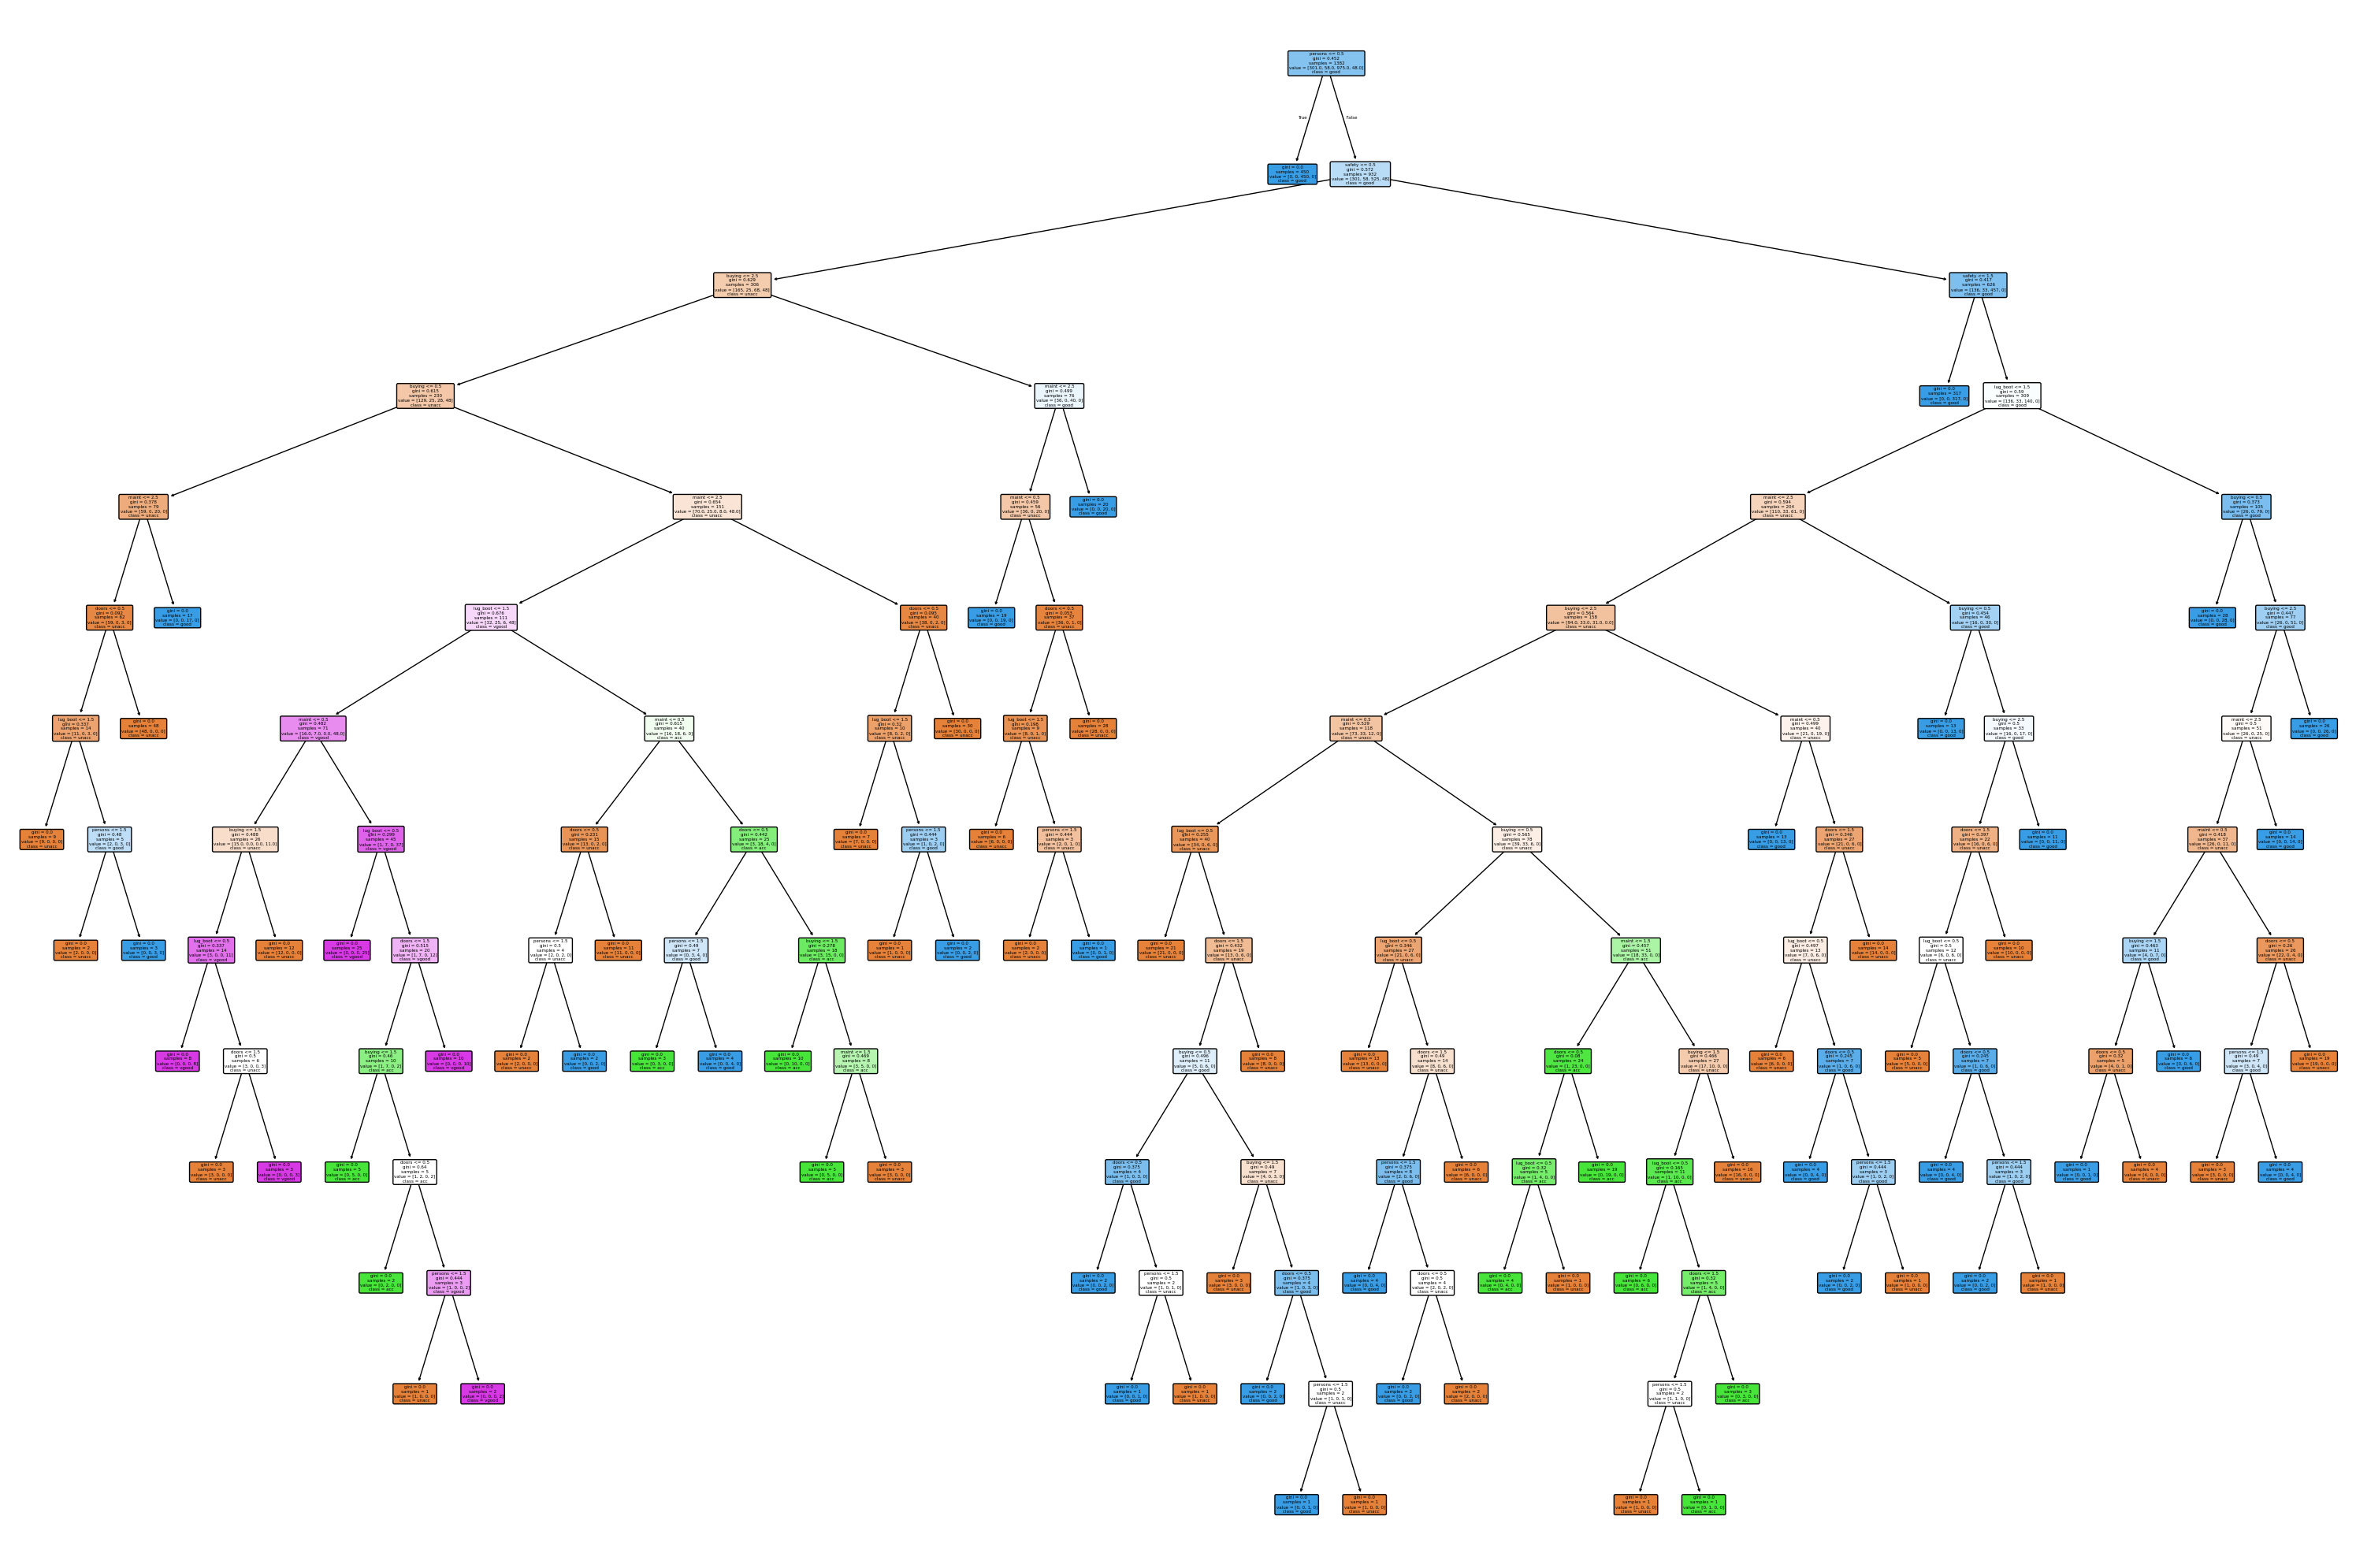

In [36]:
plt.figure(figsize=(30, 20))  
plot_tree(classifier,
          filled=True,
          fontsize=4,
          feature_names=df.columns[:-1],
          class_names=['unacc', 'acc', 'good', 'vgood'],
          rounded=True)
plt.tight_layout()
plt.savefig('decision_tree.png', dpi=300, bbox_inches='tight')

## Decission Tree dengan Kedalaman 6

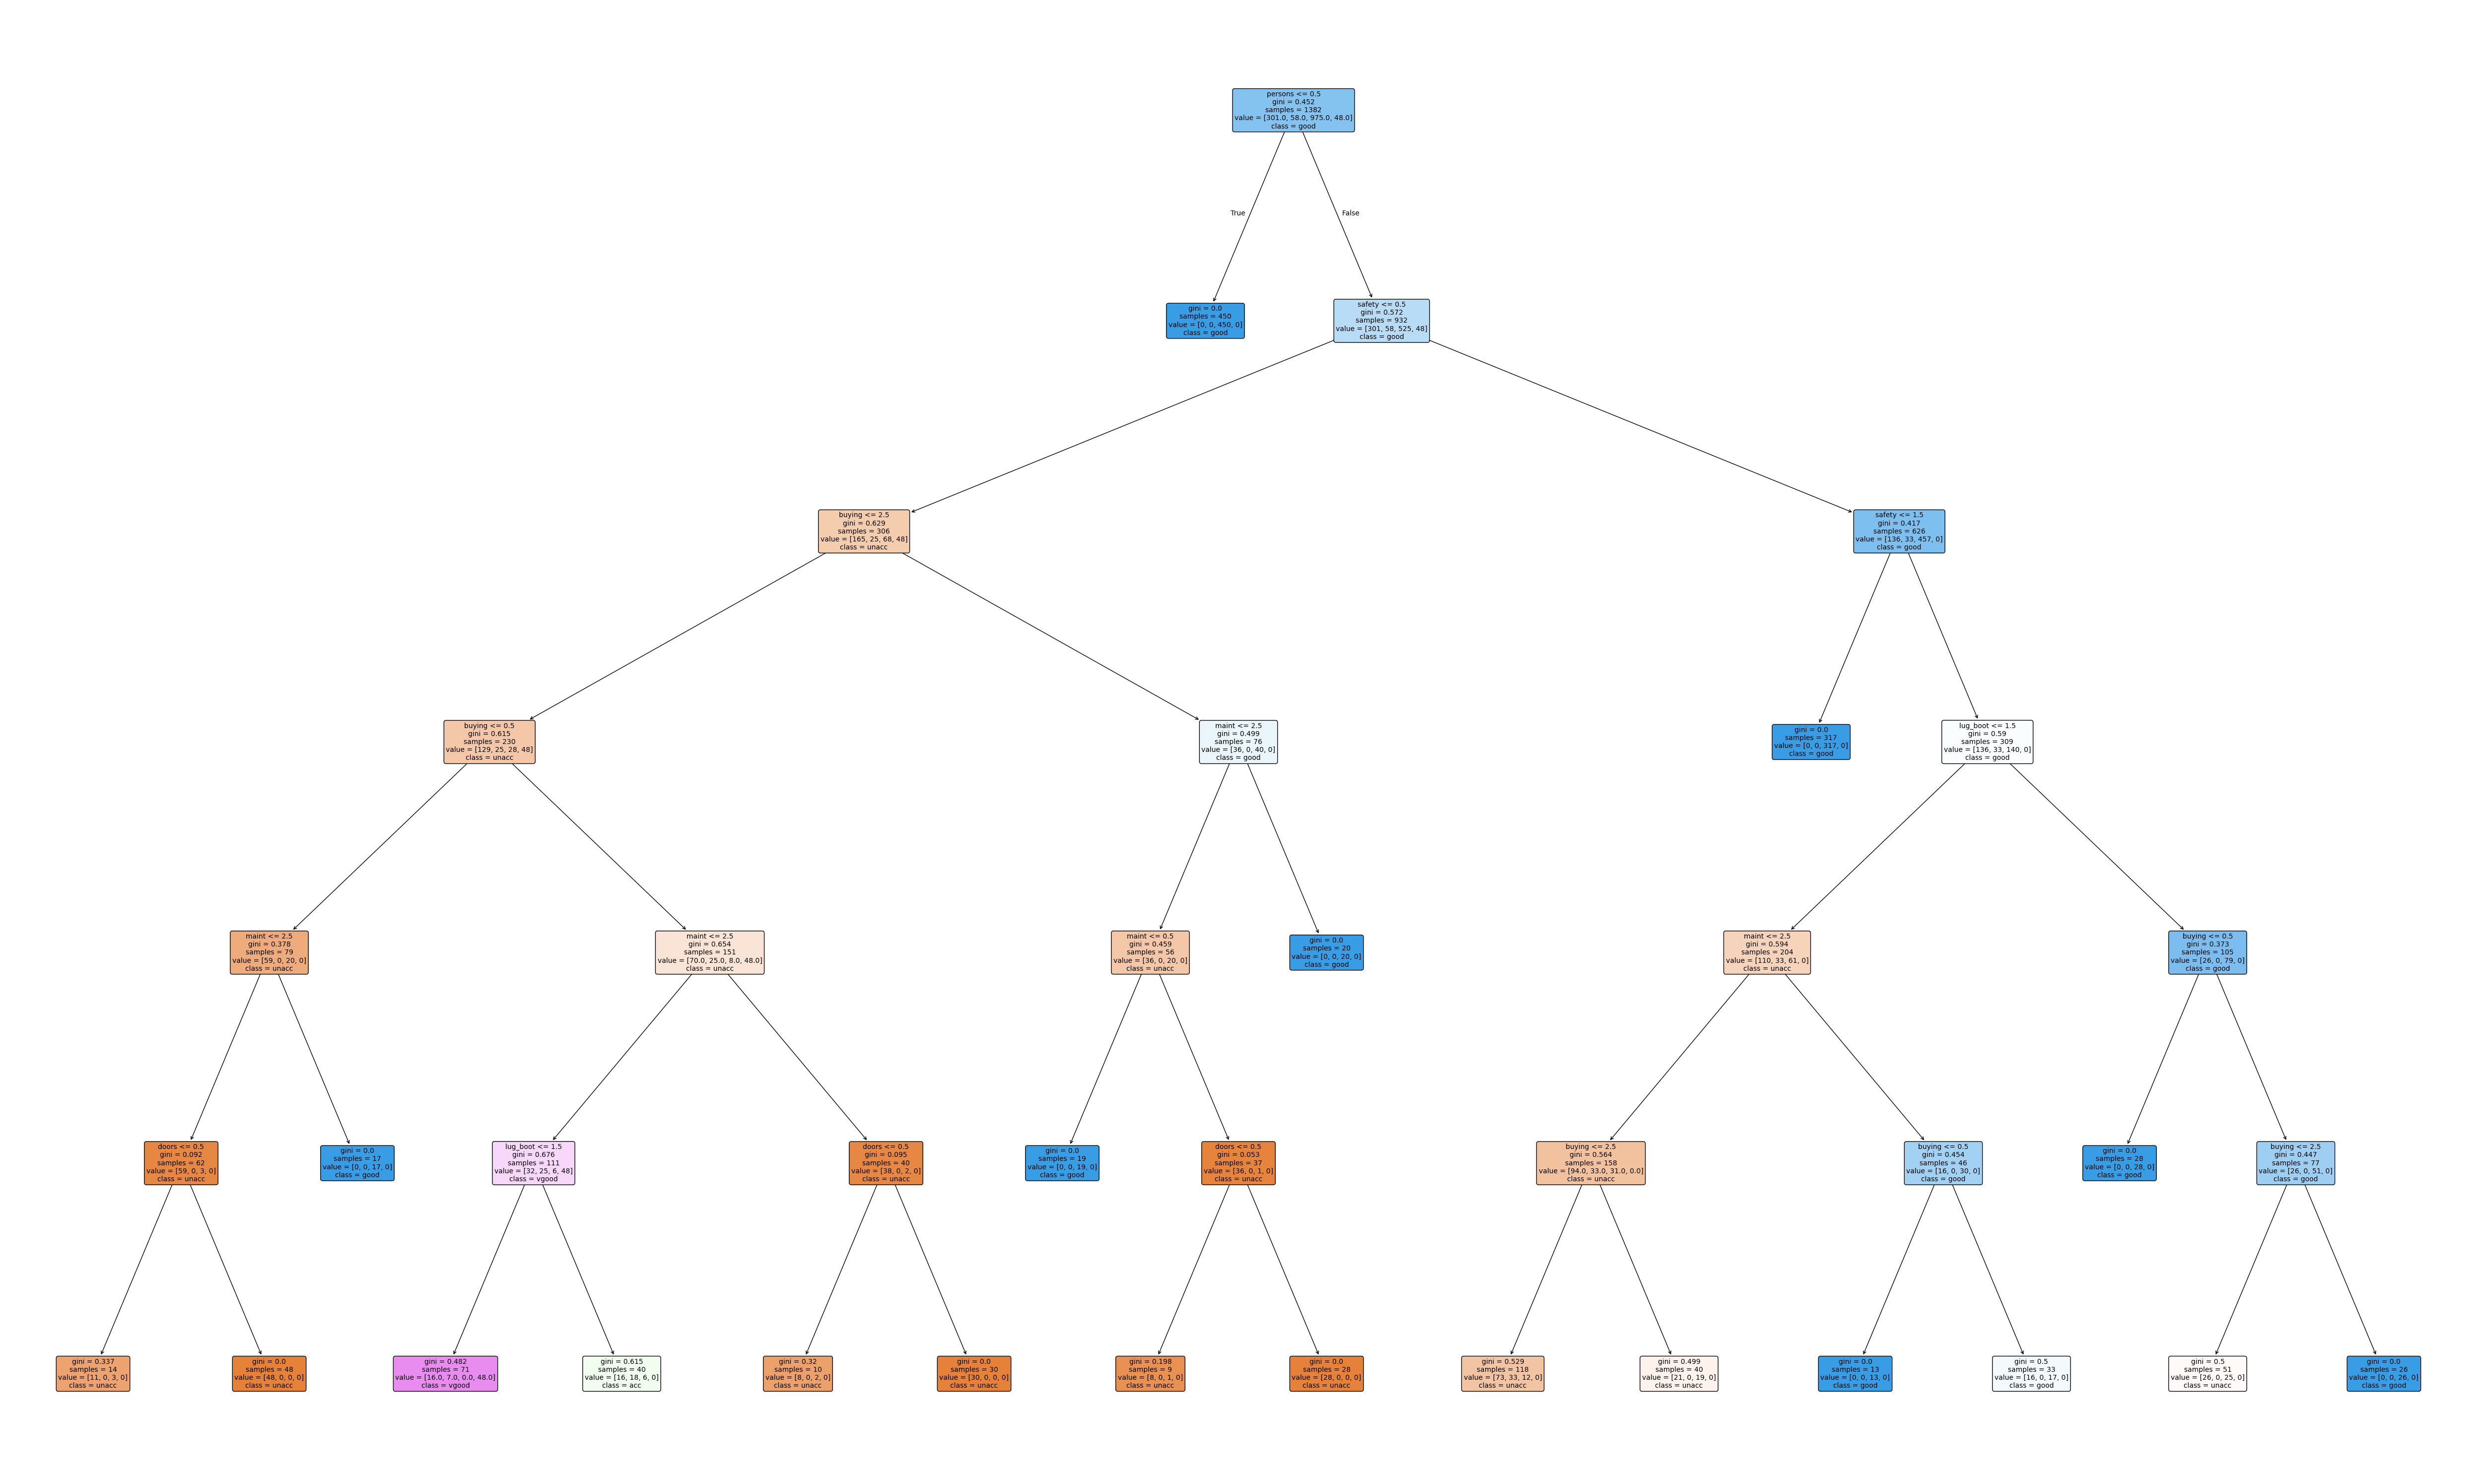

In [41]:
classifier = DecisionTreeClassifier(max_depth=6, random_state=42)

classifier.fit(x_train, y_train)

plt.figure(figsize=(50, 30))
plot_tree(classifier,
          filled=True,
          fontsize=10,
          feature_names=df.columns[:-1],
          class_names=['unacc', 'acc', 'good', 'vgood'],
          rounded=True)
plt.tight_layout()
plt.savefig('decision_tree.png', dpi=300, bbox_inches='tight')
plt.show()

In [43]:
depth = classifier.get_depth()
depth

6

In [45]:
from sklearn.metrics import accuracy_score
y_pred = classifier.predict(x_test)
akurasi = accuracy_score(y_test, y_pred)
akurasi

0.8930635838150289

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   buying    1728 non-null   int32
 1   maint     1728 non-null   int32
 2   doors     1728 non-null   int32
 3   persons   1728 non-null   int32
 4   lug_boot  1728 non-null   int32
 5   safety    1728 non-null   int32
 6   class     1728 non-null   int32
dtypes: int32(7)
memory usage: 47.4 KB
